# Data preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("data/heart.csv")

# Check for duplicates
data.drop_duplicates(inplace=True)

# Check for nulls
data.isnull().sum()

data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Scale the data

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

processed_data = data.drop(["output"], axis=1)
std_scaler = StandardScaler()

scaled_X = std_scaler.fit_transform(processed_data)
Y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.2, random_state=42)

# Neural Network with tensorflow

In [7]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))




Num GPUs Available:  1


Create the model

In [5]:
model=Sequential()

model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Input layer with 13 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/home/tom/anaconda3/envs/machinelearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-17 13:49:15.229644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 13:49:15.230022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/t

In [6]:
# Model train
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100


I0000 00:00:1713383361.361769   28672 service.cc:145] XLA service 0x70155000a290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713383361.361798   28672 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-04-17 13:49:21.408905: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-17 13:49:21.599789: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/8 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3750 - loss: 0.7370

I0000 00:00:1713383362.352825   28672 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5209 - loss: 0.6900 - val_accuracy: 0.8361 - val_loss: 0.5677
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7487 - loss: 0.5944 - val_accuracy: 0.8525 - val_loss: 0.4952
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.5451 - val_accuracy: 0.8689 - val_loss: 0.4454
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7986 - loss: 0.4895 - val_accuracy: 0.8525 - val_loss: 0.4107
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8260 - loss: 0.4421 - val_accuracy: 0.8525 - val_loss: 0.3859
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8131 - loss: 0.4342 - val_accuracy: 0.8525 - val_loss: 0.3747
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.3871 - val_accuracy: 0.8525 - val_loss: 0.3678
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3395 - val_accuracy: 0.8525 - val_loss: 0.3622
Epoch 9/10

In [18]:
def plot_graph(history):
    # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

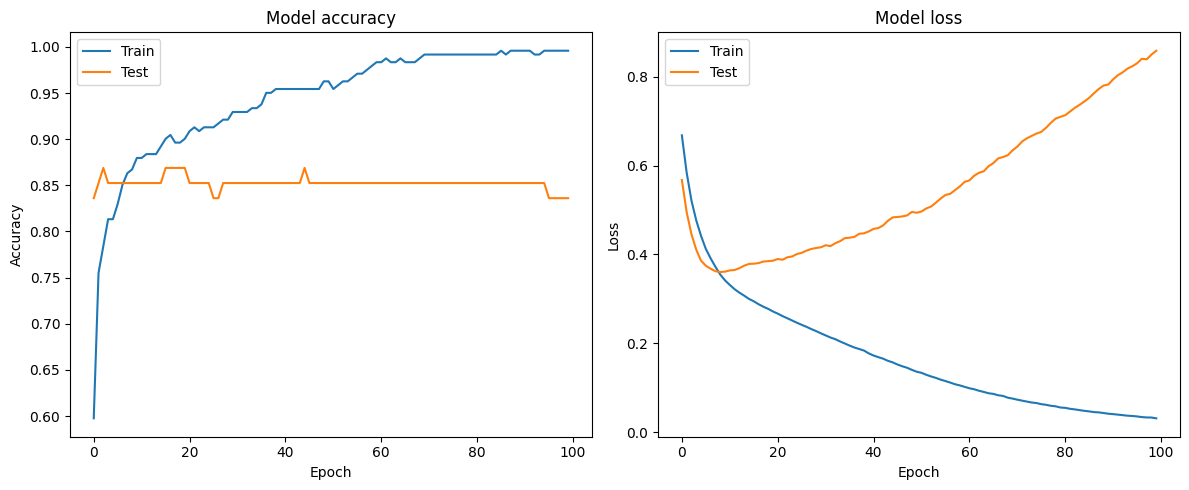

In [8]:
plot_graph(history)

# Using keras tunning

In [1]:
import kerastuner as kt

2024-04-17 16:45:42.162832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 16:45:43.256882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_9737/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
def build_model(hp):
    '''hp is hyperparameter'''
    optmmizer=hp.Choice('optimizer',values=['adam','rmsprop','adadelta','sgd'])
    model = Sequential()
    model.add(Dense(64, input_dim=13, activation='relu'))  # Input layer with 13 neurons
    model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
    model.add(Dense(1, activation='linear'))
    model.compile(loss='binary_crossentropy',optimizer=optmmizer,metrics=['accuracy'])
    return model

In [8]:
tuner=kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10)

/home/tom/anaconda3/envs/machinelearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test)) # training each sample neutal networks for 5 epochs
best_model = tuner.get_best_models()[0]

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.8032786846160889

Best val_accuracy So Far: 0.8524590134620667
Total elapsed time: 00h 00m 09s


/home/tom/anaconda3/envs/machinelearning/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [11]:
tuner.get_best_hyperparameters()[0].values


{'optimizer': 'rmsprop'}

In [14]:
model_1=tuner.get_best_models(num_models=1)[0]

/home/tom/anaconda3/envs/machinelearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/tom/anaconda3/envs/machinelearning/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [16]:
history=model_1.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=100,
                    initial_epoch=5,
                    batch_size=32)



Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8036 - loss: 0.5271 - val_accuracy: 0.8361 - val_loss: 0.7774
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.4943 - val_accuracy: 0.8525 - val_loss: 0.7918
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8961 - loss: 0.3532 - val_accuracy: 0.8525 - val_loss: 0.7749
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8420 - loss: 0.4419 - val_accuracy: 0.8525 - val_loss: 0.7682
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8776 - loss: 0.3747 - val_accuracy: 0.8525 - val_loss: 1.0069
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8733 - loss: 0.4062 - val_accuracy: 0.8525 - val_loss: 1.0013
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 0.3027 - val_accuracy: 0.8525 - val_loss: 0.9858
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9007 - loss: 0.2959 - val_accuracy: 0.8361 - val_loss: 0.

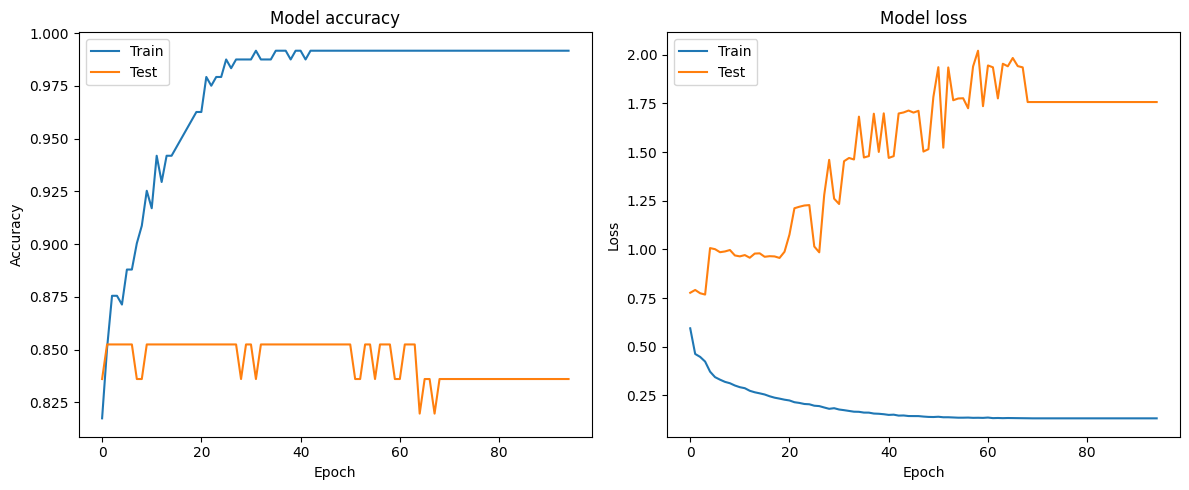

In [19]:
plot_graph(history)